# Libraries

In [63]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
#import missingno as msno

# Data Pre-processing Libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Modelling Libraries

from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

from sklearn import model_selection, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler



In [64]:
df = pd.read_csv("water_potability.csv")


In [65]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [66]:
df.describe().transpose()

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [68]:
df['Potability'].value_counts()


0    1998
1    1278
Name: Potability, dtype: int64

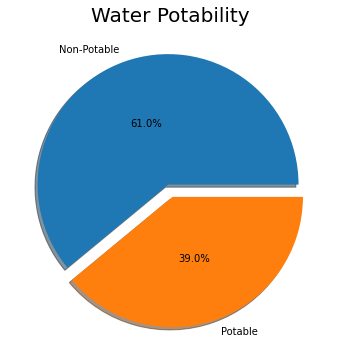

In [69]:
labels = ['Non-Potable', 'Potable']
data = [df['Potability'].value_counts()[0],
         df['Potability'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True)
plt.title("Water Potability", fontsize=20);
plt.show()


## Correlation Matrix

<AxesSubplot:>

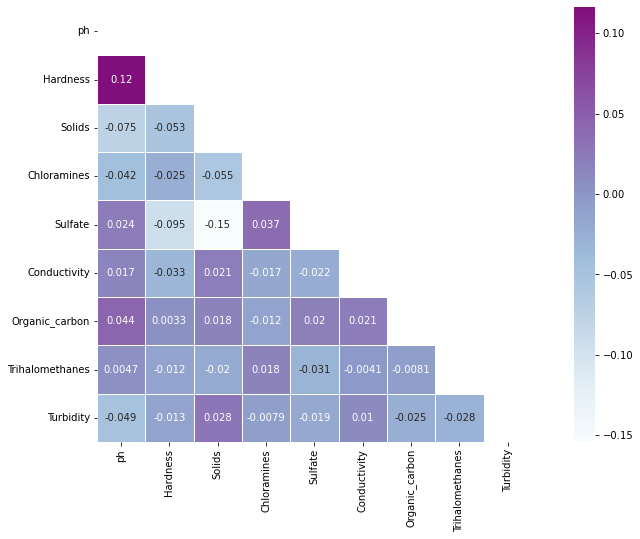

In [18]:
df = df.drop(columns=["Potability"])

#correlation matrix

corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="BuPu", center=0,
            square=True, linewidths=.5)

## Distributions of Different Atrributes


In [21]:
df = pd.read_csv("water_potability.csv")

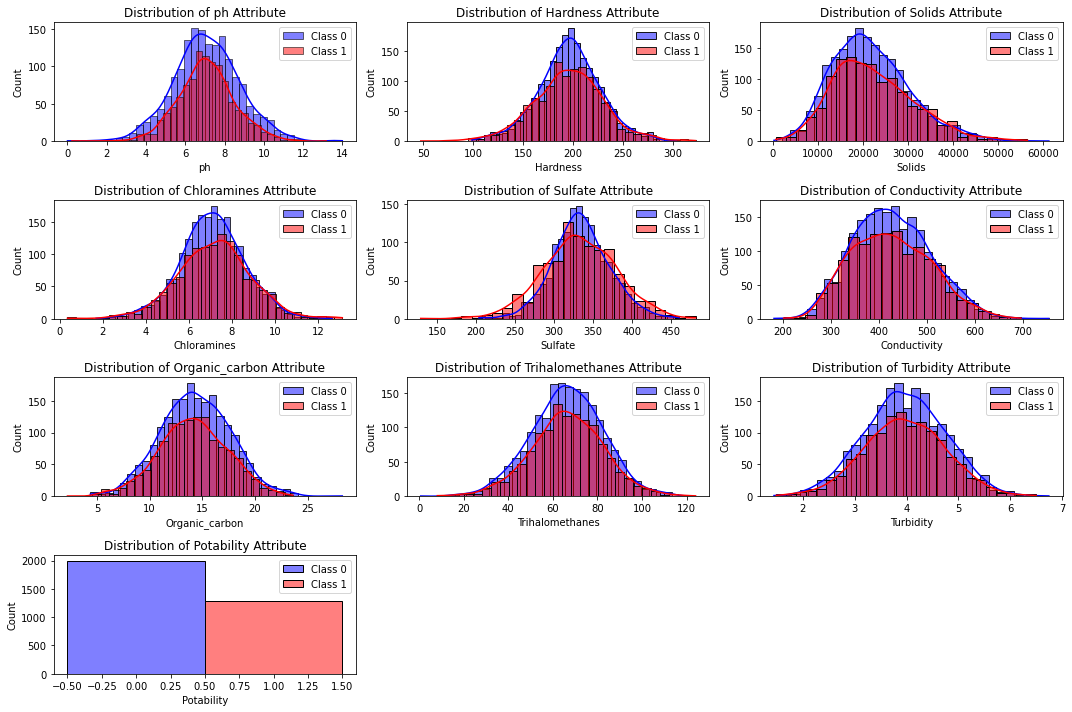

In [22]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Attribute")
    sns.histplot(df[df['Potability']==0][col],kde=True, color='blue', label='Class 0')
    sns.histplot(df[df['Potability']==1][col],kde=True, color='red', label='Class 1')
    plt.legend()
    plt.tight_layout()
    plt.plot()


## Multiple Pairwise Bivariate Distributions

[]

<Figure size 1080x720 with 0 Axes>

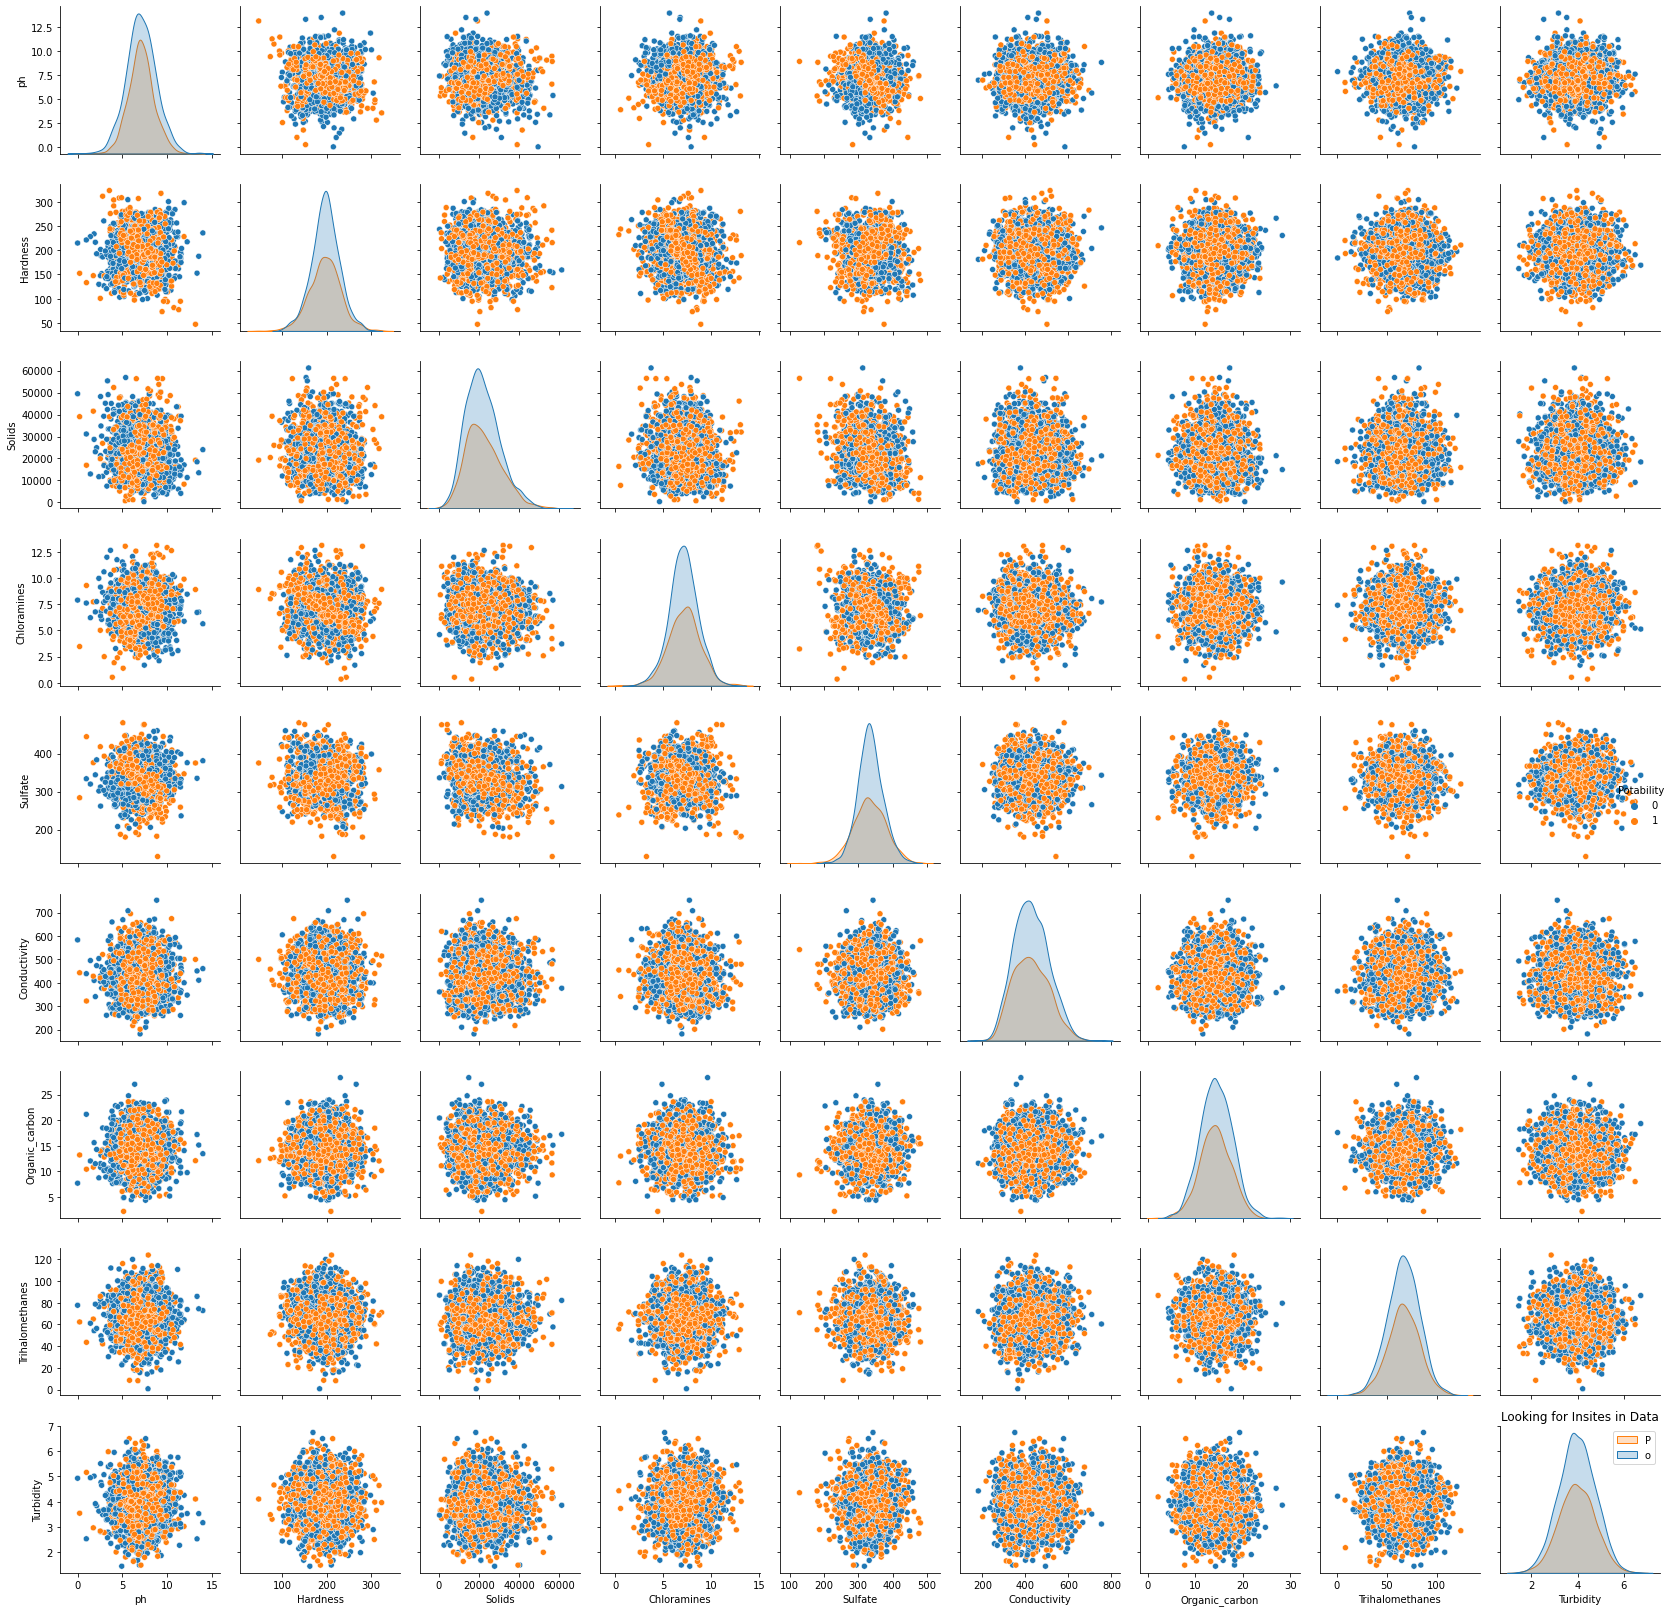

In [24]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="Potability")
plt.title("Looking for Insites in Data")
plt.legend("Potability")
plt.tight_layout()
plt.plot()


<br><br><br><br><br>
# Data Pre-processing
## Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

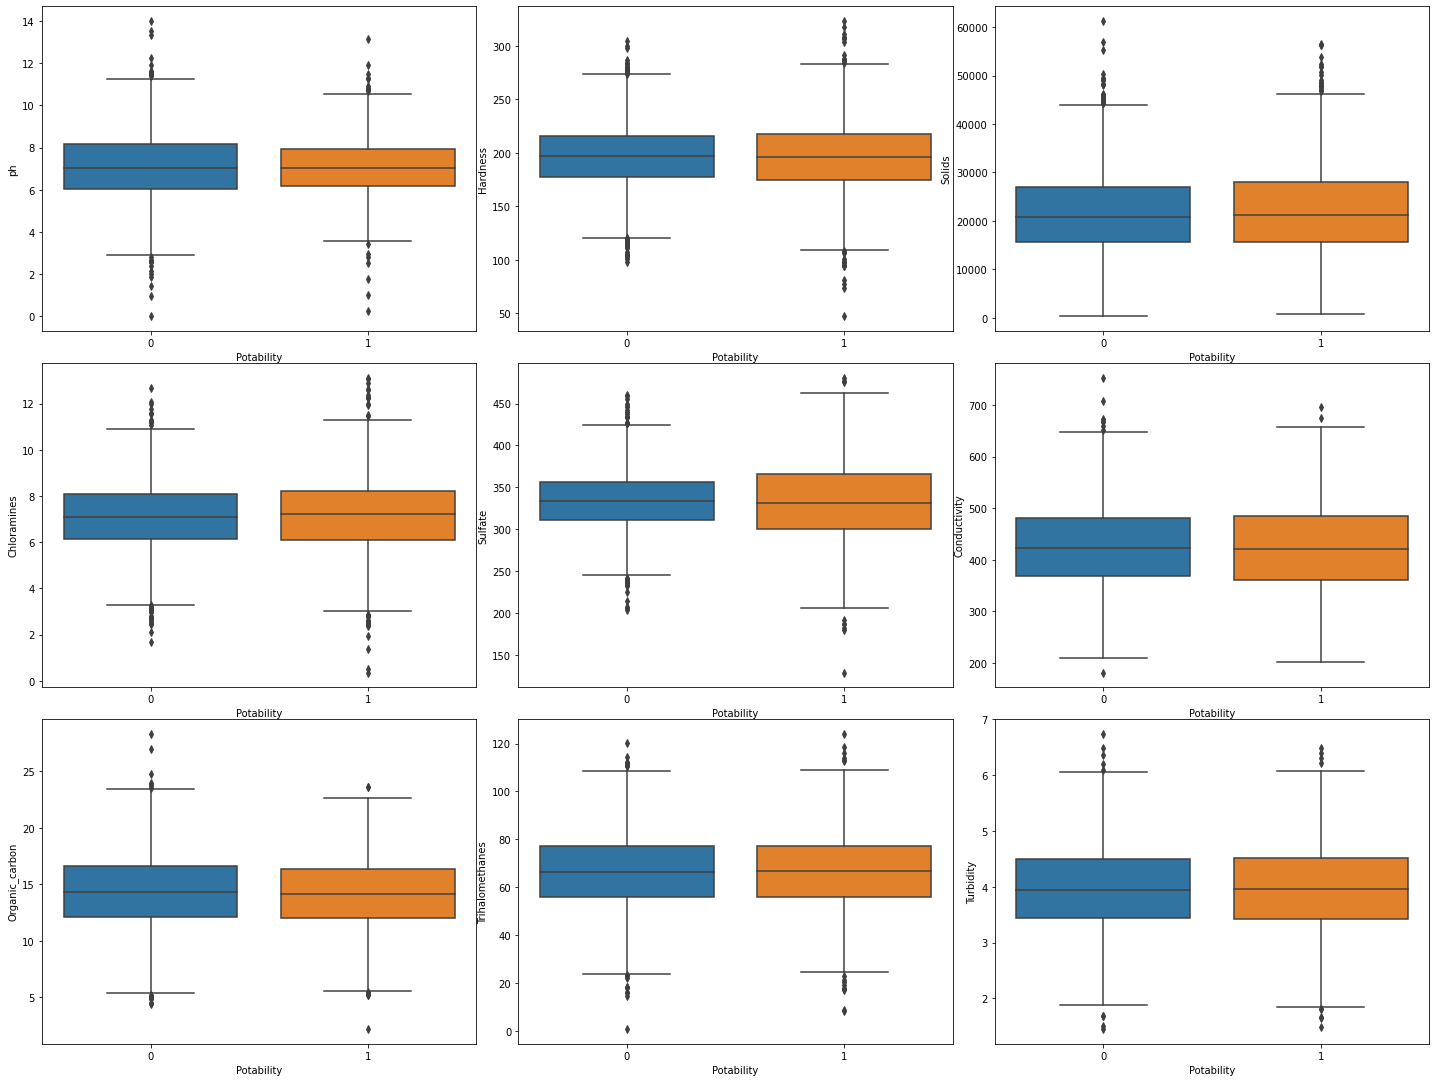

In [17]:
fig, ax = plt.subplots(3,3, figsize = (20,15))
fig.tight_layout()
k = 0
for i in range(3):
    for j in range(3):
        sns.boxplot(x="Potability", y=df.columns[k], data=df,ax=ax[i,j])
        k = k+1
plt.show

<br><br><br>



## Handling Null Values :




In [25]:
# Checking for NULLs in the data
df.isnull().sum() 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

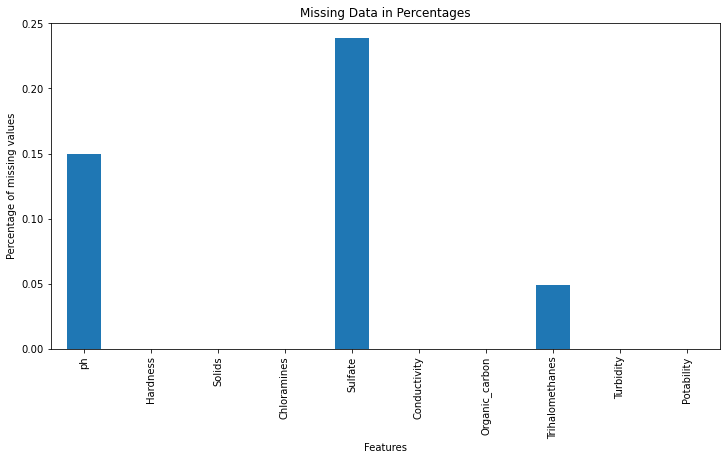

In [26]:
df.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

## Pre-processing  pipeline  


In [48]:
df = pd.read_csv('water_potability.csv')

X = df.drop('Potability',axis = 'columns')
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=45)


## procesing test  and train separately

In [49]:
    
    
#filling missing valueswith median
imputer = SimpleImputer(strategy='median') # median imputation ('mean' for mean and 'most_frequent' for mode imputations)
imputer.fit(X_train) # SimpleImputer() learns the median values from the train data
X_train = imputer.transform(X_train) # replace missing values with medians
X_test = imputer.transform(X_test) # replace missing values with medians
X_test=pd.DataFrame(X_test)
X_train= pd.DataFrame(X_train)


# standardazing 
# Import the StandardScaler class
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the StandardScaler to the training data
scaler.fit(X_train)
# Transform the training and test data using the trained StandardScaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test=pd.DataFrame(X_test)
X_train= pd.DataFrame(X_train)


#balancing
# Create a SMOTE instance
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
# Use SMOTE to balance the training data
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train= pd.DataFrame(X_train)


# Concatenate the input and target data

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Train = pd.concat([X_train, y_train], axis=1)
Test = pd.concat([X_test, y_test],axis=1)


    

In [70]:
Train

0         1         2         3         4         5         6  \
0    -1.088364  0.674203 -0.844800 -0.961589 -0.014877  0.571636 -1.131057   
1    -0.029623 -0.311281  1.044320  0.318969 -0.184158 -0.339766  1.548195   
2     0.298865 -0.111338 -0.566485  1.079502  0.357708 -1.967767  0.482451   
3    -2.006272 -2.507406  2.115127 -0.406610 -0.014877 -0.420901  0.441209   
4    -2.072732  0.217984  2.320486  0.909951 -1.504019  0.952174 -0.172799   
...        ...       ...       ...       ...       ...       ...       ...   
3191  0.313128  0.389233 -1.584811  1.291870  2.591026 -1.106425 -0.863377   
3192  0.302798 -1.040034 -0.300742  0.893572 -1.194109  0.202403 -0.267737   
3193  0.716068 -0.337339  1.509527  0.420437 -1.268638  0.362636 -2.193536   
3194 -1.021976 -1.476991 -0.118880  0.650817  1.455481  0.129922  0.439317   
3195 -0.167317 -0.941181  1.134763 -0.992641 -1.263371 -0.447529 -1.395001   

             7         8  Potability  
0     0.430003  1.259188           1  
1     0.913298 -0.726151           1  
2     1.076931  0.452490           0  
3     0.155565 -0.583976           0  
4    -1.272073  0.272115           0  
...        ...       ...         ...  
3191  1.194495 -0.263795           1  
3192  0.955277 -0.403189           1  
3193  0.220455 -0.750824           1  
3194  0.237674 -0.034308           1  
3195  0.011099  1.444503           1  

[3196 rows x 10 columns]

In [44]:
Train.to_csv('./Train2.csv', index=False)


In [29]:
Test.to_csv('./Test2.csv', index=False)
